### Visualisations of Electric Fields Inside a Paul Trap

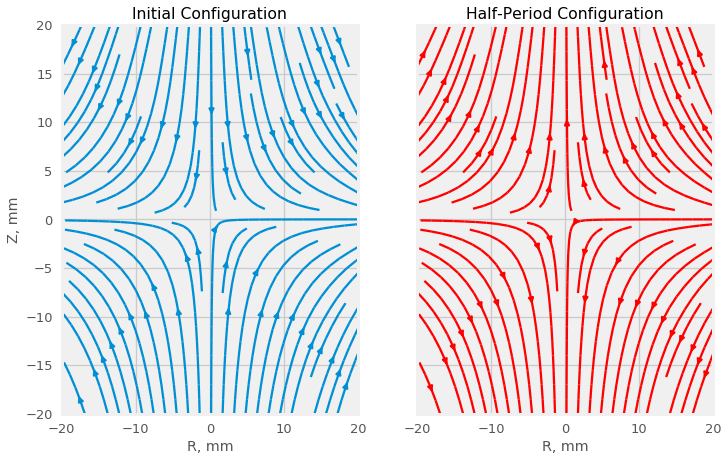

In [14]:
# First a static streamplot to show the two opposite positions of the saddle

# import data packages & give magic command
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# parameters
DC = 0
AC = 3000
Freq = 60
r0 = 20
z0 = 20
Omega = 2 * np.pi * Freq
t0 = 0
t1 = 1 / (2 * Freq)
n = 9

# creating arrays with n components & a grid of points
r = np.linspace(-r0, r0, n)
z = np.linspace(-z0, z0, n)
R, Z = np.meshgrid(r, z)

# defining the field
phi0 = DC + (AC * np.cos(Omega * t0))
phi1 = DC + (AC * np.cos(Omega * t1))


Fr0 = 2 * R * phi0 * (1/(r0**2))
Fz0 = -4 * Z * phi0 * (1/(r0**2))

Fr1 = 2 * R * phi1 * (1/(r0**2))
Fz1 = -4 * Z * phi1 * (1/(r0**2))

# creating the plots
plt.style.use('seaborn-talk')
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.streamplot(R, Z, Fr0, Fz0)
ax1.set(Title = 'Initial Configuration', ylabel = 'Z, mm', xlabel = 'R, mm')

ax2.streamplot(R, Z, Fr1, Fz1, color='r')
ax2.set(Title = 'Half-Period Configuration', xlabel = 'R, mm')
plt.show()


<IPython.core.display.Javascript object>


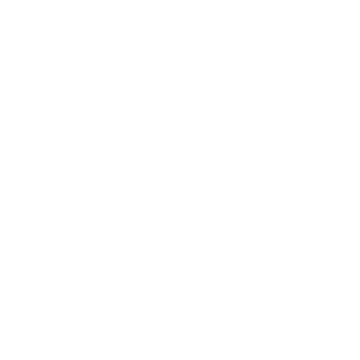

<IPython.core.display.Javascript object>


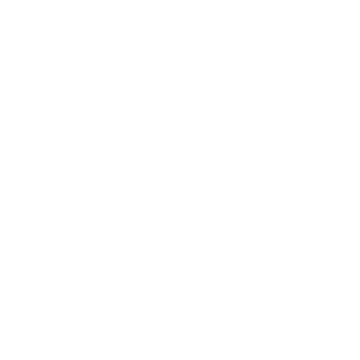

Traceback (most recent call last):
  File "C:\Users\pcast\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 389, in process
    proxy(*args, **kwargs)
  File "C:\Users\pcast\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\pcast\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [21]:
# Now a dynamic plot to show how the field develops
# I havent got the colours to change how I want them to yet
# They are changing with the size of the vector not the direction

#import data packages & give magic command
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.pyplot import colormaps
%matplotlib notebook

#settings for animation
animation_type = 'quiver'
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect('equal')

# parameters, change n to increase number of quivers
DC = 0
AC = 3000
Freq = 60
r0 = 20
z0 = 20
tEnd = 15
n = 9


# creating arrays with n components & a grid of points
# change last number in the next line to change the number of frames the animation runs through
tLrg = np.linspace(0, tEnd, 500)
t = tLrg/1000


r = np.linspace(-r0, r0, n)
z = np.linspace(-z0, z0, n)
R, Z = np.meshgrid(r, z)

# creating time dependent array 
Omega = 2 * np.pi * Freq
phi0 = DC + (AC * np.cos(Omega * t))


# initial configuration & plot
Fr0 = 2 * R * phi0[0] * (1/(r0**2))
Fz0 = -4 * Z * phi0[0] * (1/(r0**2))

# creating the function that determines the colour
# i need to find a func that makes quivers aiming towards the origin one colour and away from another
#H0 = np.arctan(Fz0/Fr0)
H0 = np.hypot(Fr0, Fz0)

qax = plt.quiver(R, Z, Fr0, Fz0, H0,  pivot = 'tip', cmap = 'coolwarm', headaxislength = 2.75)
plt.title('Electric Field Inside A Paul Trap')
plt.xlabel('R, cm')
plt.ylabel('Z, cm')


#updating data & animation
def animate(i):
    Fr = 2 * R * phi0[i] * (1/(r0**2))
    Fz = -4 * Z * phi0[i] * (1/(r0**2))
    #H = np.arctan(Fz/Fr)
    H = np.hypot(Fr, Fz)
    qax.set_UVC(Fr, Fz, H)
    

anim = FuncAnimation(fig, animate , interval=2, frames=len(t)-1, repeat=True)